<a href="https://colab.research.google.com/github/Abhishek3102/ML/blob/main/Basic_Preprocessing_Steps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Numerical Data Preprocessing**

In [1]:
import pandas as pd
import numpy as np

data = pd.DataFrame({
    'hours_studied': [4, 10, 6, 8, 5, 12, 2, 7, 3, 9, 6, 5, 11, 7, 3, 4, 8, 10, 2, 9],
    'sleep_hours': [6, 8, 7, 6, 5, 7, 4, 6, 5, 8, 7, 6, 9, 6, 4, 5, 7, 8, 4, 7],
    'attendance_rate': [70, 90, 85, 88, 60, 95, 50, 80, 55, 92, 86, 77, 96, 82, 58, 66, 89, 91, 52, 90],
    'previous_score': [60, 85, 70, 75, 65, 90, 50, 72, 55, 88, 74, 68, 91, 73, 52, 61, 78, 87, 49, 85],
    'part_time_job': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0],
    'pass_exam': [0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1]
})

print(data.head())


   hours_studied  sleep_hours  attendance_rate  previous_score  part_time_job  \
0              4            6               70              60              1   
1             10            8               90              85              0   
2              6            7               85              70              1   
3              8            6               88              75              0   
4              5            5               60              65              1   

   pass_exam  
0          0  
1          1  
2          1  
3          1  
4          0  


### Interaction term

In [2]:
# Interaction term
data['study_sleep_interaction'] = data['hours_studied'] * data['sleep_hours']

# View updated data
print(data[['hours_studied', 'sleep_hours', 'study_sleep_interaction']].head())

   hours_studied  sleep_hours  study_sleep_interaction
0              4            6                       24
1             10            8                       80
2              6            7                       42
3              8            6                       48
4              5            5                       25


### Polynomial Features (Degree=2)

In [3]:
from sklearn.preprocessing import PolynomialFeatures

# Select features for polynomial expansion
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
poly_features = poly.fit_transform(data[['hours_studied', 'sleep_hours']])

# Convert to DataFrame with proper names
poly_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(['hours_studied', 'sleep_hours']))

# Concatenate with original data
data_poly = pd.concat([data, poly_df], axis=1)

# View new columns
print(poly_df.head())

   hours_studied  sleep_hours  hours_studied^2  hours_studied sleep_hours  \
0            4.0          6.0             16.0                       24.0   
1           10.0          8.0            100.0                       80.0   
2            6.0          7.0             36.0                       42.0   
3            8.0          6.0             64.0                       48.0   
4            5.0          5.0             25.0                       25.0   

   sleep_hours^2  
0           36.0  
1           64.0  
2           49.0  
3           36.0  
4           25.0  


In [4]:
poly_df.columns

Index(['hours_studied', 'sleep_hours', 'hours_studied^2',
       'hours_studied sleep_hours', 'sleep_hours^2'],
      dtype='object')

### Recursive Feature Elimination (RFE)

In [5]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Drop target temporarily
X = data.drop('pass_exam', axis=1)
y = data['pass_exam']

model = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=model, n_features_to_select=5)
rfe.fit(X, y)

selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features.tolist())

# Filter dataset to selected features + target
data_selected = data[selected_features.tolist() + ['pass_exam']]
print(data_selected.head())

Selected Features: ['hours_studied', 'attendance_rate', 'previous_score', 'part_time_job', 'study_sleep_interaction']
   hours_studied  attendance_rate  previous_score  part_time_job  \
0              4               70              60              1   
1             10               90              85              0   
2              6               85              70              1   
3              8               88              75              0   
4              5               60              65              1   

   study_sleep_interaction  pass_exam  
0                       24          0  
1                       80          1  
2                       42          1  
3                       48          1  
4                       25          0  


In [6]:
numeric_columns = ['hours_studied', 'sleep_hours', 'attendance_rate',
                   'previous_score', 'study_sleep_interaction']

### Z-Score Method

In [7]:
from scipy.stats import zscore
import numpy as np

# Compute Z-scores
z_scores = np.abs(zscore(data[numeric_columns]))

# Identify rows where ALL columns have Z > 3 (very strict)
outliers_z_all = (z_scores > 3).all(axis=1)

# Identify rows where ANY column has Z > 3 (less strict, more common)
outliers_z_any = (z_scores > 3).any(axis=1)

# Print outlier rows
print("Outliers (Z-score - ANY column > 3):")
print(data[outliers_z_any])

Outliers (Z-score - ANY column > 3):
Empty DataFrame
Columns: [hours_studied, sleep_hours, attendance_rate, previous_score, part_time_job, pass_exam, study_sleep_interaction]
Index: []


### IQR Method

In [8]:
# Compute Q1, Q3, and IQR
Q1 = data[numeric_columns].quantile(0.25)
Q3 = data[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Determine outliers
outliers_iqr = ((data[numeric_columns] < (Q1 - 1.5 * IQR)) |
                (data[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)

# Print outlier rows
print("Outliers (IQR method):")
print(data[outliers_iqr])

Outliers (IQR method):
Empty DataFrame
Columns: [hours_studied, sleep_hours, attendance_rate, previous_score, part_time_job, pass_exam, study_sleep_interaction]
Index: []


# ***Text Data***

In [9]:
import pandas as pd

text_data = pd.DataFrame({
    'text_column': [
        "The product was amazing and very useful!",
        "I didn't like the service at all.",
        "Excellent experience, would buy again.",
        "Worst purchase I've ever made.",
        "The item arrived on time and in good condition.",
        "Terrible customer service. Not recommended!",
        "It was okay, nothing special.",
        "Absolutely fantastic! Loved it.",
        "The quality is poor and disappointing.",
        "Great value for the price.",
        "Fast shipping but the product is cheap.",
        "Customer support was helpful and friendly.",
        "Not worth the money.",
        "It exceeded my expectations!",
        "Received a damaged item. Very upset.",
        "Best decision I've made.",
        "The packaging was very neat.",
        "Disappointed with the overall experience.",
        "Highly satisfied with the product.",
        "Would not recommend to anyone."
    ]
})

print(text_data.head())

                                       text_column
0         The product was amazing and very useful!
1                I didn't like the service at all.
2           Excellent experience, would buy again.
3                   Worst purchase I've ever made.
4  The item arrived on time and in good condition.


### Tokenization

In [18]:
import nltk

nltk.download('punkt_tab', download_dir='/usr/local/nltk_data')
nltk.data.path.append('/usr/local/nltk_data')

[nltk_data] Downloading package punkt_tab to /usr/local/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [19]:
from nltk.tokenize import word_tokenize

print(word_tokenize("Just making sure this works now."))

['Just', 'making', 'sure', 'this', 'works', 'now', '.']


In [20]:
from nltk.tokenize import word_tokenize
text_data['tokens'] = text_data['text_column'].apply(word_tokenize)

print(text_data[['text_column', 'tokens']].head())

                                       text_column  \
0         The product was amazing and very useful!   
1                I didn't like the service at all.   
2           Excellent experience, would buy again.   
3                   Worst purchase I've ever made.   
4  The item arrived on time and in good condition.   

                                              tokens  
0  [The, product, was, amazing, and, very, useful...  
1      [I, did, n't, like, the, service, at, all, .]  
2   [Excellent, experience, ,, would, buy, again, .]  
3           [Worst, purchase, I, 've, ever, made, .]  
4  [The, item, arrived, on, time, and, in, good, ...  


### Stemming

In [22]:
print(text_data.columns)

Index(['text_column', 'tokens'], dtype='object')


In [23]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
text_data['stemmed'] = text_data['text_column'].apply(
    lambda x: ' '.join([stemmer.stem(word) for word in word_tokenize(x)])
)

print(text_data[['text_column', 'stemmed']].head())

                                       text_column  \
0         The product was amazing and very useful!   
1                I didn't like the service at all.   
2           Excellent experience, would buy again.   
3                   Worst purchase I've ever made.   
4  The item arrived on time and in good condition.   

                                       stemmed  
0           the product wa amaz and veri use !  
1           i did n't like the servic at all .  
2             excel experi , would buy again .  
3              worst purchas i 've ever made .  
4  the item arriv on time and in good condit .  


### Lemmatization

In [24]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()
text_data['lemmatized'] = text_data['text_column'].apply(
    lambda x: ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(x)])
)

print(text_data[['text_column', 'lemmatized']].head())


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


                                       text_column  \
0         The product was amazing and very useful!   
1                I didn't like the service at all.   
2           Excellent experience, would buy again.   
3                   Worst purchase I've ever made.   
4  The item arrived on time and in good condition.   

                                         lemmatized  
0          The product wa amazing and very useful !  
1               I did n't like the service at all .  
2          Excellent experience , would buy again .  
3                  Worst purchase I 've ever made .  
4  The item arrived on time and in good condition .  


### Removing Stopwords, Punctuation, and Special Characters

In [26]:
import string
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

# Lowercase, remove stopwords + punctuation
text_data['cleaned_text'] = text_data['text_column'].apply(
    lambda x: ' '.join([word for word in word_tokenize(x.lower())
                        if word not in stop_words and word not in string.punctuation])
)

# Remove special characters (keep only letters, digits, spaces)
text_data['cleaned_text'] = text_data['cleaned_text'].apply(
    lambda x: ''.join([char for char in x if char.isalnum() or char == ' '])
)

print(text_data[['text_column', 'cleaned_text']].head())

                                       text_column  \
0         The product was amazing and very useful!   
1                I didn't like the service at all.   
2           Excellent experience, would buy again.   
3                   Worst purchase I've ever made.   
4  The item arrived on time and in good condition.   

                       cleaned_text  
0            product amazing useful  
1                   nt like service  
2    excellent experience would buy  
3       worst purchase ve ever made  
4  item arrived time good condition  


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Vectorization using TF-IDF

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=500)
X_tfidf = vectorizer.fit_transform(text_data['cleaned_text'])

# Convert to DataFrame
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

print(tfidf_df.head())

   absolutely   amazing  anyone   arrived  best       buy  cheap  condition  \
0         0.0  0.616729     0.0  0.000000   0.0  0.000000    0.0   0.000000   
1         0.0  0.000000     0.0  0.000000   0.0  0.000000    0.0   0.000000   
2         0.0  0.000000     0.0  0.000000   0.0  0.531094    0.0   0.000000   
3         0.0  0.000000     0.0  0.000000   0.0  0.000000    0.0   0.000000   
4         0.0  0.000000     0.0  0.457741   0.0  0.000000    0.0   0.457741   

   customer  damaged  ...  support  terrible      time  upset    useful  \
0       0.0      0.0  ...      0.0       0.0  0.000000    0.0  0.616729   
1       0.0      0.0  ...      0.0       0.0  0.000000    0.0  0.000000   
2       0.0      0.0  ...      0.0       0.0  0.000000    0.0  0.000000   
3       0.0      0.0  ...      0.0       0.0  0.000000    0.0  0.000000   
4       0.0      0.0  ...      0.0       0.0  0.457741    0.0  0.000000   

   value      ve     worst  worth    would  
0    0.0  0.0000  0.000000   

In [28]:
tfidf_df.columns

Index(['absolutely', 'amazing', 'anyone', 'arrived', 'best', 'buy', 'cheap',
       'condition', 'customer', 'damaged', 'decision', 'disappointed',
       'disappointing', 'ever', 'exceeded', 'excellent', 'expectations',
       'experience', 'fantastic', 'fast', 'friendly', 'good', 'great',
       'helpful', 'highly', 'item', 'like', 'loved', 'made', 'money', 'neat',
       'nothing', 'nt', 'okay', 'overall', 'packaging', 'poor', 'price',
       'product', 'purchase', 'quality', 'received', 'recommend',
       'recommended', 'satisfied', 'service', 'shipping', 'special', 'support',
       'terrible', 'time', 'upset', 'useful', 'value', 've', 'worst', 'worth',
       'would'],
      dtype='object')

In [29]:
tfidf_df["ve"].value_counts()

,count
ve,
0.00000,18
0.41230,1
0.46684,1


### Plot Word Clouds
Word clouds visualize the frequency (or importance) of words in the text.

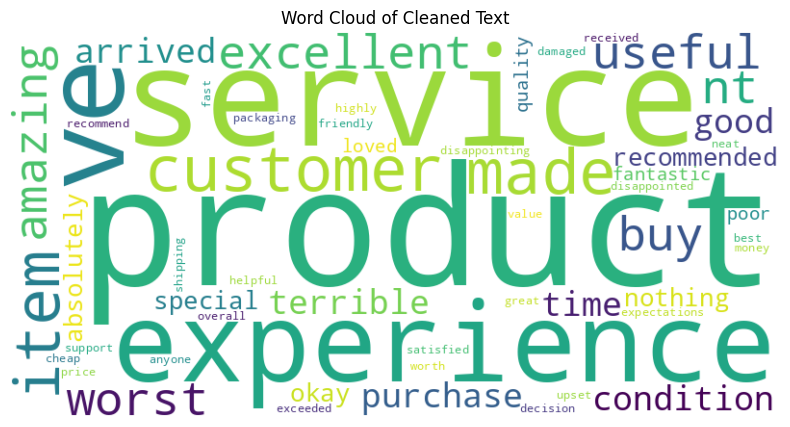

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all cleaned text into one string
text_combined = ' '.join(text_data['cleaned_text'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)

# Plot it
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Cleaned Text')
plt.show()

### CountVectorizer (simple word counts)

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(max_features=500)
X_count = count_vectorizer.fit_transform(text_data['cleaned_text'])

# Convert to DataFrame for inspection
count_df = pd.DataFrame(X_count.toarray(), columns=count_vectorizer.get_feature_names_out())
print(count_df.head())

   absolutely  amazing  anyone  arrived  best  buy  cheap  condition  \
0           0        1       0        0     0    0      0          0   
1           0        0       0        0     0    0      0          0   
2           0        0       0        0     0    1      0          0   
3           0        0       0        0     0    0      0          0   
4           0        0       0        1     0    0      0          1   

   customer  damaged  ...  support  terrible  time  upset  useful  value  ve  \
0         0        0  ...        0         0     0      0       1      0   0   
1         0        0  ...        0         0     0      0       0      0   0   
2         0        0  ...        0         0     0      0       0      0   0   
3         0        0  ...        0         0     0      0       0      0   1   
4         0        0  ...        0         0     1      0       0      0   0   

   worst  worth  would  
0      0      0      0  
1      0      0      0  
2      0   

In [35]:
for col in text_data.columns:
  # Access the actual column data using text_data[col]
  print(text_data[col].value_counts())

text_column
The product was amazing and very useful!           1
I didn't like the service at all.                  1
Excellent experience, would buy again.             1
Worst purchase I've ever made.                     1
The item arrived on time and in good condition.    1
Terrible customer service. Not recommended!        1
It was okay, nothing special.                      1
Absolutely fantastic! Loved it.                    1
The quality is poor and disappointing.             1
Great value for the price.                         1
Fast shipping but the product is cheap.            1
Customer support was helpful and friendly.         1
Not worth the money.                               1
It exceeded my expectations!                       1
Received a damaged item. Very upset.               1
Best decision I've made.                           1
The packaging was very neat.                       1
Disappointed with the overall experience.          1
Highly satisfied with the product.

### Word2Vec (word embeddings)

In [37]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 66.9 MB/s eta 0:00:00


In [38]:
from gensim.models import Word2Vec
import nltk

# Make sure tokens column exists (if not, tokenize)
if 'tokens' not in text_data.columns:
    from nltk.tokenize import word_tokenize
    nltk.download('punkt')
    text_data['tokens'] = text_data['text_column'].apply(word_tokenize)

# Train Word2Vec model
w2v_model = Word2Vec(sentences=text_data['tokens'], vector_size=100, window=5, min_count=1, workers=4)

# Example: get vector for the word 'product'
print(w2v_model.wv['product'])


[ 8.1680221e-03 -4.4280794e-03  8.9611728e-03  8.2445247e-03
 -4.4280845e-03  2.5754454e-04  4.2866603e-03 -3.8523879e-03
 -5.5591348e-03 -6.5478920e-03 -6.6180952e-04 -3.3534536e-04
  4.4312803e-03 -2.4762747e-03 -1.6654305e-04  2.4652944e-03
  4.8445472e-03 -2.0568907e-05 -6.3250726e-03 -9.3423519e-03
  1.2034318e-06  6.6962838e-03  1.4582762e-03 -8.9916149e-03
 -7.9496922e-03  6.5570693e-03 -3.8329044e-03  6.2523060e-03
 -6.6653048e-03  8.4935483e-03 -6.5213540e-03  3.2647683e-03
 -1.0139974e-03 -6.7998916e-03 -3.2990605e-03 -1.1263412e-03
 -5.4434575e-03 -1.2333773e-03 -7.5422539e-03  2.6180474e-03
  9.0790214e-03 -2.3856487e-03 -1.0066938e-03  3.5229402e-03
  8.6965840e-03 -5.9362282e-03 -6.9045858e-03 -2.9293844e-03
  9.1730515e-03  8.8435394e-04 -8.6686751e-03 -1.4460096e-03
  9.4969925e-03 -7.5341240e-03 -5.3599165e-03  9.3005793e-03
 -8.9365672e-03  3.8174468e-03  6.6451158e-04  6.6889427e-03
  8.3153108e-03 -2.8406847e-03 -3.9786333e-03  8.8949688e-03
  2.0734614e-03  6.25288

### Topic Modeling using LDA (Latent Dirichlet Allocation)

LDA extracts topics from a collection of documents.

In [39]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Vectorize text with CountVectorizer
count_vect = CountVectorizer(max_features=500)
X_counts = count_vect.fit_transform(text_data['cleaned_text'])

# Fit LDA model (let's try 3 topics)
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(X_counts)

# Show top words for each topic
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx + 1}:")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        print()

print_top_words(lda, count_vect.get_feature_names_out(), 10)

Topic #1:
customer, experience, would, service, buy, excellent, recommended, terrible, support, friendly

Topic #2:
item, time, arrived, condition, good, fast, cheap, shipping, special, okay

Topic #3:
product, ve, made, purchase, ever, worst, upset, damaged, received, quality



# **Time Series**

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

# 1. Create Timestamp Range (hourly for 20 students)
date_rng = pd.date_range(start='2022-01-01', periods=20, freq='H')

# 2. Simulate student-related and time series data
np.random.seed(42)
time_data = pd.DataFrame({
    'timestamp': date_rng,
    'hours_studied': np.random.randint(1, 12, size=20),
    'sleep_hours': np.random.randint(4, 9, size=20),
    'attendance_rate': np.random.randint(50, 100, size=20),
    'previous_score': np.random.randint(40, 100, size=20),
    'part_time_job': np.random.choice([0, 1], size=20),
    'value': 50 + np.sin(np.linspace(0, 3, 20)) * 10 + np.random.normal(0, 2, 20)  # simulated test performance score
})

# 3. Target: pass/fail based on score threshold
time_data['pass_exam'] = (time_data['value'] > 55).astype(int)

# 4. Time-based Feature Extraction
time_data['timestamp'] = pd.to_datetime(time_data['timestamp'])
time_data['year'] = time_data['timestamp'].dt.year
time_data['month'] = time_data['timestamp'].dt.month
time_data['day'] = time_data['timestamp'].dt.day
time_data['hour'] = time_data['timestamp'].dt.hour
time_data['weekday'] = time_data['timestamp'].dt.weekday

# 5. Lag & Rolling Features
time_data['lag_1'] = time_data['value'].shift(1)
time_data['rolling_mean_3'] = time_data['value'].rolling(window=3).mean()

# 6. Stationarity Differencing
time_data['diff'] = time_data['value'].diff()

# 7. Cyclical Time Encoding
time_data['hour_sin'] = np.sin(2 * np.pi * time_data['hour'] / 24)
time_data['hour_cos'] = np.cos(2 * np.pi * time_data['hour'] / 24)

# 8. Scaling for 'value' column (used in models)
scaler = StandardScaler()
time_data['value_scaled'] = scaler.fit_transform(time_data[['value']])

# 9. Drop rows with NaNs from rolling/lag/diff
time_data.dropna(inplace=True)

# 10. Show Final time_dataset
print(time_data.head())

            timestamp  hours_studied  sleep_hours  attendance_rate  \
2 2022-01-01 02:00:00             11            7               56   
3 2022-01-01 03:00:00              8            8               70   
4 2022-01-01 04:00:00              5            4               58   
5 2022-01-01 05:00:00              7            7               88   
6 2022-01-01 06:00:00             10            5               67   

   previous_score  part_time_job      value  pass_exam  year  month  day  \
2              53              1  50.844565          0  2022      1    1   
3              56              0  54.830537          0  2022      1    1   
4              75              1  57.068444          1  2022      1    1   
5              89              0  58.875324          1  2022      1    1   
6              79              1  59.907484          1  2022      1    1   

   hour  weekday      lag_1  rolling_mean_3      diff  hour_sin      hour_cos  \
2     2        5  49.811212       49.3208

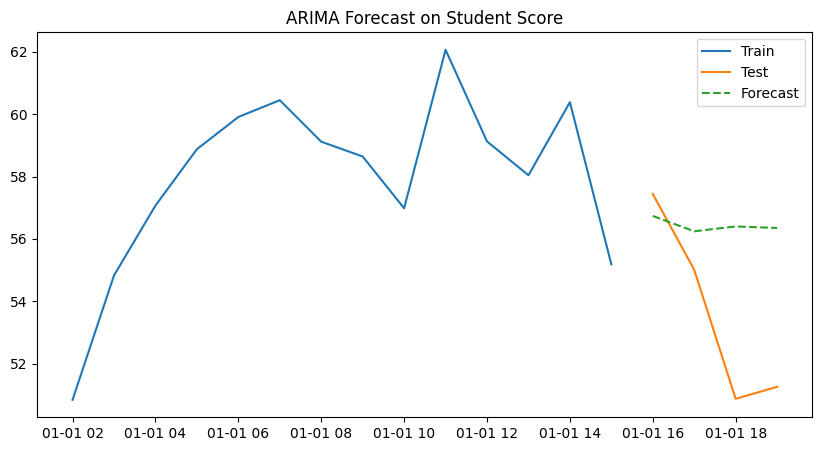

In [41]:
# Set timestamp as index
time_data.set_index('timestamp', inplace=True)

# ARIMA modeling on 'value'
train = time_data['value'].iloc[:-4]
test = time_data['value'].iloc[-4:]

model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=4)

# Plot
plt.figure(figsize=(10,5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast, label='Forecast', linestyle='--')
plt.title('ARIMA Forecast on Student Score')
plt.legend()
plt.show()


### Time Series + Forecast Plot

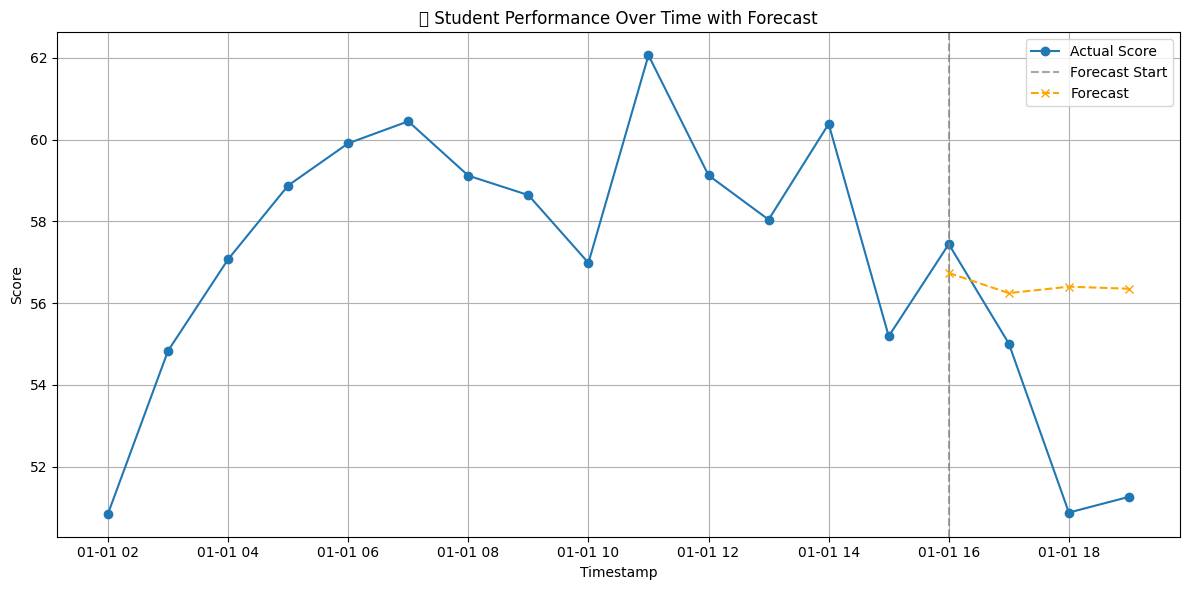

In [42]:
plt.figure(figsize=(12, 6))
plt.plot(time_data.index, time_data['value'], marker='o', label='Actual Score')
plt.axvline(test.index[0], color='gray', linestyle='--', alpha=0.7, label='Forecast Start')
plt.plot(test.index, forecast, label='Forecast', color='orange', linestyle='--', marker='x')
plt.title('📈 Student Performance Over Time with Forecast')
plt.xlabel('Timestamp')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

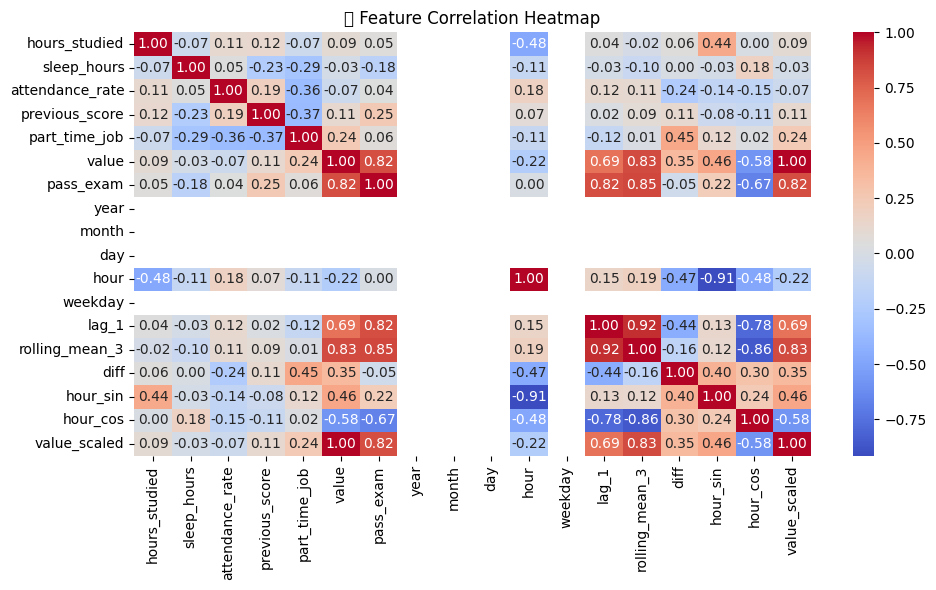

In [43]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(time_data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("🔍 Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

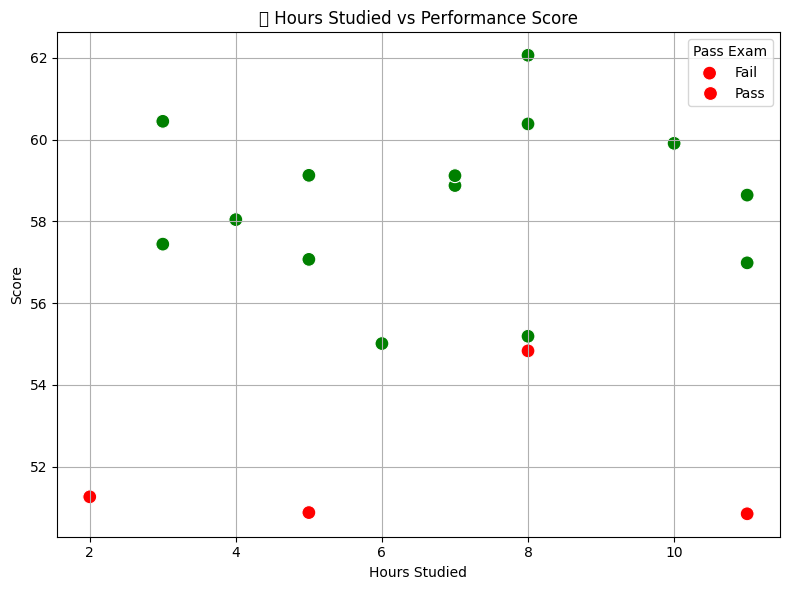

In [44]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=time_data, x='hours_studied', y='value', hue='pass_exam', palette={0: 'red', 1: 'green'}, s=100)
plt.title('🧠 Hours Studied vs Performance Score')
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.legend(title='Pass Exam', labels=['Fail', 'Pass'])
plt.grid(True)
plt.tight_layout()
plt.show()

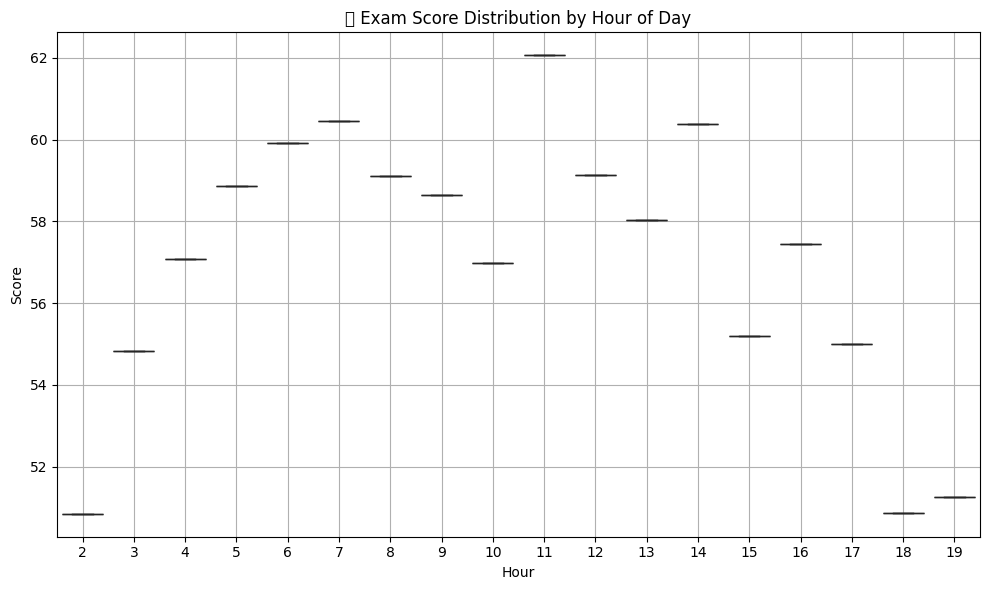

In [45]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=time_data, x='hour', y='value', palette='viridis')
plt.title('⏰ Exam Score Distribution by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Score')
plt.grid(True)
plt.tight_layout()
plt.show()

In [55]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Reset index for animation
animated_df = time_data.reset_index()

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))
line, = ax.plot([], [], 'b-o')

ax.set_xlim(animated_df['timestamp'].min(), animated_df['timestamp'].max())
ax.set_ylim(animated_df['value'].min() - 5, animated_df['value'].max() + 5)
ax.set_title('Animated Time Series: Student Performance')
ax.set_xlabel('Timestamp')
ax.set_ylabel('Score')

# Update function
def update(frame):
    current_data = animated_df.iloc[:frame + 1]
    line.set_data(current_data['timestamp'], current_data['value'])
    return line,

# Create animation
ani = FuncAnimation(fig, update, frames=len(animated_df), interval=500, blit=False, repeat=False)

# Render animation in notebook
HTML(ani.to_jshtml())

In [53]:
ani.save("student_performance.gif", writer="pillow", fps=2)

In [48]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 52.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 57.9 MB/s eta 0:00:00


2025-10-21 15:23:24.819 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-10-21 15:23:24.824 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-10-21 15:23:24.828 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-21 15:23:25.398 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-10-21 15:23:25.400 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-21 15:23:25.401 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-21 15:23:25.403 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-21 15:23:25.439 Thread 'MainThread': missin

DeltaGenerator()

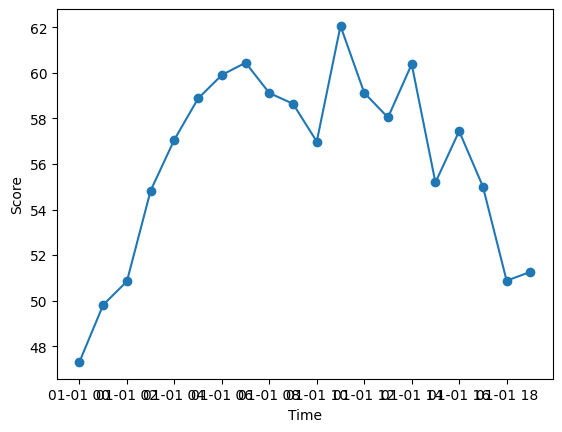

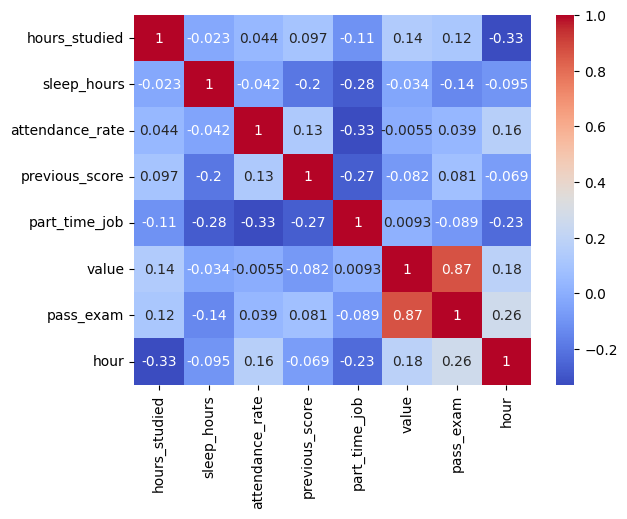

In [49]:
# dashboard_app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Simulated dataset (recreate or load your CSV)
from sklearn.preprocessing import StandardScaler
import numpy as np

@st.cache_data
def load_data():
    date_rng = pd.date_range(start='2022-01-01', periods=20, freq='H')
    np.random.seed(42)
    df = pd.DataFrame({
        'timestamp': date_rng,
        'hours_studied': np.random.randint(1, 12, size=20),
        'sleep_hours': np.random.randint(4, 9, size=20),
        'attendance_rate': np.random.randint(50, 100, size=20),
        'previous_score': np.random.randint(40, 100, size=20),
        'part_time_job': np.random.choice([0, 1], size=20),
        'value': 50 + np.sin(np.linspace(0, 3, 20)) * 10 + np.random.normal(0, 2, 20)
    })
    df['pass_exam'] = (df['value'] > 55).astype(int)
    df['hour'] = df['timestamp'].dt.hour
    return df

df = load_data()
st.title("📈 Student Performance Dashboard")

# Time series plot
st.subheader("📊 Performance Over Time")
fig, ax = plt.subplots()
ax.plot(df['timestamp'], df['value'], marker='o')
ax.set_xlabel("Time")
ax.set_ylabel("Score")
st.pyplot(fig)

# Correlation heatmap
st.subheader("🔍 Feature Correlation")
fig, ax = plt.subplots()
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', ax=ax)
st.pyplot(fig)

# Scatter plot
st.subheader("🧠 Hours Studied vs Score")
st.scatter_chart(df[['hours_studied', 'value']])

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Features & target
features = ['hours_studied', 'sleep_hours', 'attendance_rate', 'previous_score', 'part_time_job']
X = time_data[features]
y = time_data['pass_exam']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# Reports
print("🔹 Random Forest Report:\n", classification_report(y_test, y_pred_rf))
print("🔹 XGBoost Report:\n", classification_report(y_test, y_pred_xgb))

🔹 Random Forest Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.67      1.00      0.80         4

    accuracy                           0.67         6
   macro avg       0.33      0.50      0.40         6
weighted avg       0.44      0.67      0.53         6

🔹 XGBoost Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.67      1.00      0.80         4

    accuracy                           0.67         6
   macro avg       0.33      0.50      0.40         6
weighted avg       0.44      0.67      0.53         6



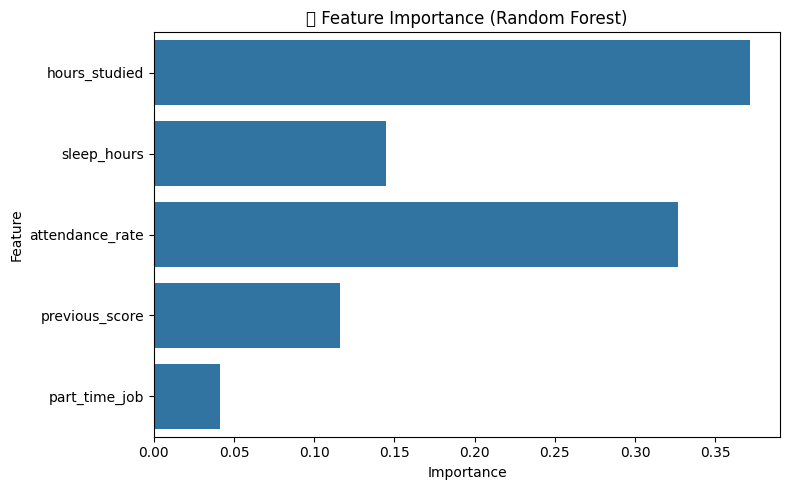

In [51]:
importances = rf.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=feature_names)
plt.title("🎯 Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()